In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('banglore.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df1=df.drop(['area_type','availability','society','balcony'],axis='columns')
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [6]:
count=df1.groupby('location')['location'].agg('count')
count

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [7]:
count=df1.groupby('size')['size'].agg('count')
count

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [8]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2=df1.dropna()
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df2['bhk']=df2['size'].apply(lambda x: float( x.split(' ')[0]))
df2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17816\2417503695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: float( x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4.0


In [14]:
df2=df2.drop(['size'],axis='columns')
df2

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Uttarahalli,1440,2.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Kothanur,1200,2.0,51.00,2.0
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5.0
13316,Richards Town,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4689,4.0,488.00,4.0


In [15]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df2[~df2['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4.0
122,Hebbal,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,1145 - 1340,2.0,43.490,2.0
188,KR Puram,1015 - 1540,2.0,56.800,2.0
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2.0
12990,Talaghattapura,1804 - 2273,3.0,122.000,3.0
13059,Harlur,1200 - 1470,2.0,72.760,2.0
13265,Hoodi,1133 - 1384,2.0,59.135,2.0


In [18]:
def convet(x):
    split=x.split('-')
    if len(split)==2:
        return (float(split[0])+float(split[1]))/2
    try:
        return float(x)
    except: 
        return None


In [19]:
df2['total_sqft']=df2['total_sqft'].apply(convet)
df2

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0
13316,Richards Town,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0


In [20]:
df2['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [21]:
df3=df2.copy()
df3

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0
13316,Richards Town,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0


In [22]:
df3['price_per_sqft']=df3['price']*100000 / df3['total_sqft']
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


In [23]:
df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
df3.location=df3.location.apply(lambda x: x.strip())
count_of_loc= df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
count_of_loc

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [25]:
len(count_of_loc[count_of_loc<=10])

1052

In [26]:
location_count_less_than_10=count_of_loc[count_of_loc<=10]
location_count_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [27]:
df3.location=df3.location.apply(lambda x:'other' if x in location_count_less_than_10 else x)
df3

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0,6689.834926
13316,other,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0,10407.336319


In [28]:
len(df3.location.unique())

242

In [29]:
df3.shape

(13246, 6)

In [30]:
1056/2

528.0

In [31]:
df4=df3[~(df3.total_sqft / df3.bhk<300)]
df4

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0,6689.834926
13316,other,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0,10407.336319


In [32]:
df4['price_per_sqft'].unique()

array([ 3699.81060606,  4615.38461538,  4305.55555556, ...,
        6689.83492615,  5258.54513585, 10407.33631904])

In [33]:
df4.shape

(12502, 6)

In [34]:
df4['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
def remove_pps_outlier(x):
    reduced_df=pd.DataFrame()
    for key,sub_df in df4.groupby('location'):
        m=np.mean(sub_df.price_per_sqft)
        st=np.std(sub_df.price_per_sqft)
        red_df=sub_df[(sub_df['price_per_sqft']>(m-st))&(sub_df['price_per_sqft']<(m+st)) ]
        reduced_df=pd.concat([reduced_df,red_df])
    return reduced_df
df5=remove_pps_outlier(df4['price_per_sqft'])
df5.shape

(10241, 6)

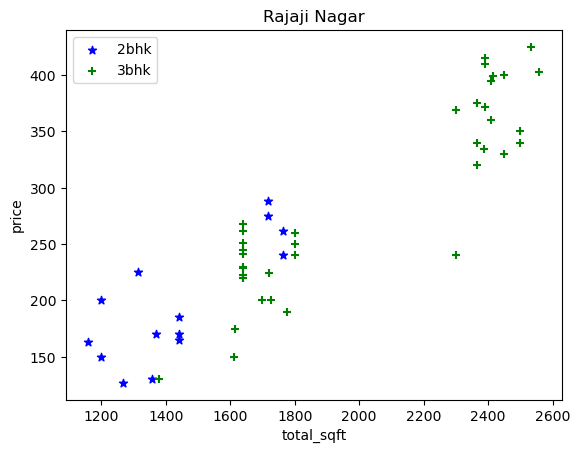

In [36]:
%matplotlib inline
def scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',marker='*',label='2bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3bhk')
    plt.xlabel("total_sqft")
    plt.ylabel('price')
    plt.legend()
    plt.title(location)
scatter_chart(df5,'Rajaji Nagar')

In [37]:
def remove_bhk(df):
    exclude=np.array([])
    for location , location_df in df.groupby('location'):
        bhk_st={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_st[bhk]={
         'mean':np.mean(bhk_df.price_per_sqft),
         'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
         }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_st.get(bhk-1)
            if stats and stats['count']>5:
                exclude=np.append(exclude,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude,axis='index')
df6=remove_bhk(df5) 
df6.shape

(7329, 6)

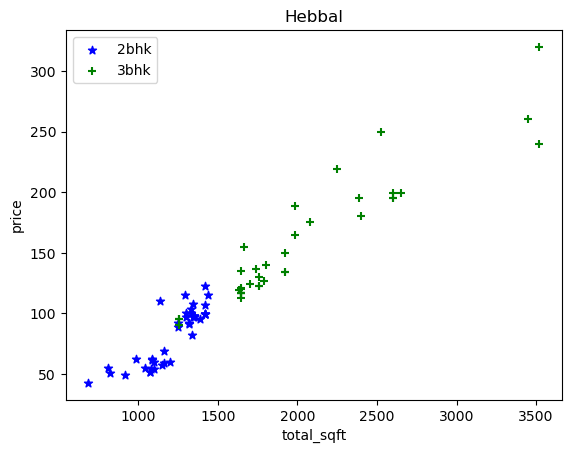

In [38]:
def scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',marker='*',label='2bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3bhk')
    plt.xlabel("total_sqft")
    plt.ylabel('price')
    plt.legend()
    plt.title(location)

scatter_chart(df6,'Hebbal')

In [39]:
df6[df6.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
8636,Neeladri Nagar,4000.0,12.0,160.0,10.0,4000.000000
3096,other,12000.0,12.0,525.0,10.0,4375.000000
3609,other,10000.0,16.0,550.0,16.0,5500.000000
7979,other,6000.0,12.0,150.0,11.0,2500.000000
9935,other,5425.0,13.0,275.0,13.0,5069.124424


In [40]:
df6

,location,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
848,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2152,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
7138,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
7358,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668
...,...,...,...,...,...,...
13238,other,1200.0,2.0,70.0,2.0,5833.333333
13245,other,1800.0,1.0,200.0,1.0,11111.111111
13285,other,1353.0,2.0,110.0,2.0,8130.081301
13291,other,812.0,1.0,26.0,1.0,3201.970443


In [41]:
df6[df6.bath>df6.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
7709,Chikkabanavar,2460.0,7.0,80.0,4.0,3252.032520
11366,Nagasandra,7000.0,8.0,450.0,4.0,6428.571429
12103,Thanisandra,1806.0,6.0,116.0,3.0,6423.034330
2620,other,11338.0,9.0,1000.0,6.0,8819.897689


In [42]:
df7=df6[df6.bath<df6.bhk+2]
df7.shape

(7251, 6)

In [43]:
df7

,location,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
848,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2152,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
7138,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
7358,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668
...,...,...,...,...,...,...
13238,other,1200.0,2.0,70.0,2.0,5833.333333
13245,other,1800.0,1.0,200.0,1.0,11111.111111
13285,other,1353.0,2.0,110.0,2.0,8130.081301
13291,other,812.0,1.0,26.0,1.0,3201.970443


In [44]:
df8=df7.drop(['price_per_sqft'],axis='columns')
df8

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,428.0,4.0
848,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2152,1st Block Jayanagar,1875.0,2.0,235.0,3.0
7138,1st Block Jayanagar,1200.0,2.0,130.0,3.0
7358,1st Block Jayanagar,1235.0,2.0,148.0,2.0
...,...,...,...,...,...
13238,other,1200.0,2.0,70.0,2.0
13245,other,1800.0,1.0,200.0,1.0
13285,other,1353.0,2.0,110.0,2.0
13291,other,812.0,1.0,26.0,1.0


In [45]:
dummies=pd.get_dummies(df8['location'])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
dummies1=dummies.drop(['other'],axis='columns')
dummies1

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df9=pd.concat([df8,dummies1],axis='columns')
df9

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1st Block Jayanagar,1875.0,2.0,235.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1st Block Jayanagar,1200.0,2.0,130.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1st Block Jayanagar,1235.0,2.0,148.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,other,1200.0,2.0,70.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13245,other,1800.0,1.0,200.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,other,1353.0,2.0,110.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13291,other,812.0,1.0,26.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df10=df9.drop(['location'],axis='columns')
df10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,130.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,148.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,1200.0,2.0,70.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13245,1800.0,1.0,200.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,1353.0,2.0,110.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13291,812.0,1.0,26.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
x=df10.drop(['price'],axis='columns')
x

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,1200.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13245,1800.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,1353.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13291,812.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y=df10.price
y

210      428.0
848      194.0
2152     235.0
7138     130.0
7358     148.0
         ...  
13238     70.0
13245    200.0
13285    110.0
13291     26.0
13316    400.0
Name: price, Length: 7251, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(Lasso(),x,y,cv=cv)


array([0.6846968 , 0.68991129, 0.70381598, 0.64870183, 0.71001741])

In [90]:
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Lasso

from sklearn.svm import SVC

model_r={
    
    'LinearRegression':{
    'model':LinearRegression(),
    'params':{
       'fit_intercept':[True,False] ,
        'copy_X':[True,False],
        'positive':[True,False]
    }
    },
    'Lasso':{
        'model':Lasso(),
        'params':{
        'alpha':[1,2],
        'selection':['random','cyclic']
        }
    }  
}

In [103]:
scores=[]
for model_name,mp in model_r.items():
    cv=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    cv.fit(x,y)
    print(cv.best_score_)
    scores.append({
        'model':model_name,
        'best_score':cv.best_score_,
        'best_params':cv.best_params_
    }
    )


0.6087972294635747
0.672279147600179


In [107]:
pd.DataFrame(scores,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,LinearRegression,0.608797,"{'copy_X': True, 'fit_intercept': False, 'posi..."
1,Lasso,0.672279,"{'alpha': 2, 'selection': 'cyclic'}"


In [110]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [112]:
import pickle
with open('bangalore_price_model.pickle','wb') as f:
    pickle.dump(model,f)

In [113]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [120]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
columns
with open('bangalore_price_json','w') as f:
    f.write(json.dumps(columns))
